In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Load dataset

df = pd.read_excel(r"C:\Users\asgra\Downloads\computer_science_student_career_datasetMar62024 (1).xlsx")

In [16]:
label_encoders = {}
categorical_cols = ["Internship_Experience", "Certifications_Training", "Leadership_Experience"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
# Define programming language columns
programming_cols = ["Python", "Java", "C++", "JavaScript", "C#", "PHP", "Ruby", "Swift", "Go", "Rust", "Others"]

# Create target variable based on average programming score
df["Programming_Avg"] = df[programming_cols].mean(axis=1)
df["Performance"] = np.where(df["Programming_Avg"] >= 5.5, "High", "Low")
df["Performance"] = LabelEncoder().fit_transform(df["Performance"])

In [18]:
df["Programming_Avg"]

0       6.181818
1       5.545455
2       4.909091
3       4.181818
4       4.909091
          ...   
7995    4.000000
7996    4.000000
7997    4.181818
7998    5.636364
7999    2.454545
Name: Programming_Avg, Length: 8000, dtype: float64

In [19]:
df["Programming_Avg"]>5.5

0        True
1        True
2       False
3       False
4       False
        ...  
7995    False
7996    False
7997    False
7998     True
7999    False
Name: Programming_Avg, Length: 8000, dtype: bool

In [20]:
X = df.drop(columns=["Performance", "Programming_Avg"])
y = df["Performance"]

In [67]:
# Select top 10 features excluding programming scores
selector = SelectKBest(f_classif, k=12)
selector.fit(X.drop(columns=programming_cols), y)
selected_features = X.drop(columns=programming_cols).columns[selector.get_support()]


In [68]:
selected_features

Index(['Software_Development_Experience', 'Database_Management',
       'Networking_Skills', 'Web_Development_Experience',
       'Communication_Skills', 'Problem_Solving_Abilities',
       'Teamwork_Collaboration', 'Time_Management', 'Adaptability',
       'Internship_Experience', 'Certifications_Training',
       'Leadership_Experience'],
      dtype='object')

In [69]:
X_updated = df[selected_features.tolist() + programming_cols]

In [70]:
X_updated

,Software_Development_Experience,Database_Management,Networking_Skills,Web_Development_Experience,Communication_Skills,Problem_Solving_Abilities,Teamwork_Collaboration,Time_Management,Adaptability,Internship_Experience,...,Java,C++,JavaScript,C#,PHP,Ruby,Swift,Go,Rust,Others
0,2,3,7,5,7,5,5,9,1,0,...,4,9,7,8,1,5,8,6,4,7
1,8,9,2,1,3,4,5,6,7,1,...,7,4,8,8,9,5,2,8,0,3
2,5,0,3,6,0,9,2,3,1,0,...,1,5,8,5,8,0,9,5,9,3
3,4,4,5,7,1,7,9,4,1,0,...,7,5,7,8,7,4,0,3,2,0
4,6,2,9,7,2,6,1,3,3,1,...,9,2,8,4,4,6,3,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,6,7,1,6,6,0,8,7,1,1,...,9,0,0,1,7,7,0,8,0,6
7996,1,6,7,7,5,3,8,0,9,0,...,9,7,8,1,2,2,2,6,6,0
7997,7,1,3,0,6,7,3,4,7,1,...,0,3,8,0,5,2,2,9,4,4
7998,5,7,5,4,3,5,1,3,6,1,...,7,4,6,9,1,9,6,1,7,6


In [71]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7995    1
7996    1
7997    1
7998    0
7999    1
Name: Performance, Length: 8000, dtype: int32

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=42)

In [73]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Predictions
y_pred_dt = clf.predict(X_test)

In [75]:
# Evaluate Decision Tree model
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, pos_label=1):.2f}")  
print(f"Recall: {recall_score(y_test, y_pred_dt, pos_label=1):.2f}")        
print(f"F1 Score: {f1_score(y_test, y_pred_dt, pos_label=1):.2f}")          
print(classification_report(y_test, y_pred_dt, target_names=['Low', 'High']))

Decision Tree Model Evaluation:
Accuracy: 0.86
Precision: 0.92
Recall: 0.93
F1 Score: 0.92
              precision    recall  f1-score   support

         Low       0.47      0.42      0.44       206
        High       0.92      0.93      0.92      1394

    accuracy                           0.86      1600
   macro avg       0.69      0.68      0.68      1600
weighted avg       0.86      0.86      0.86      1600



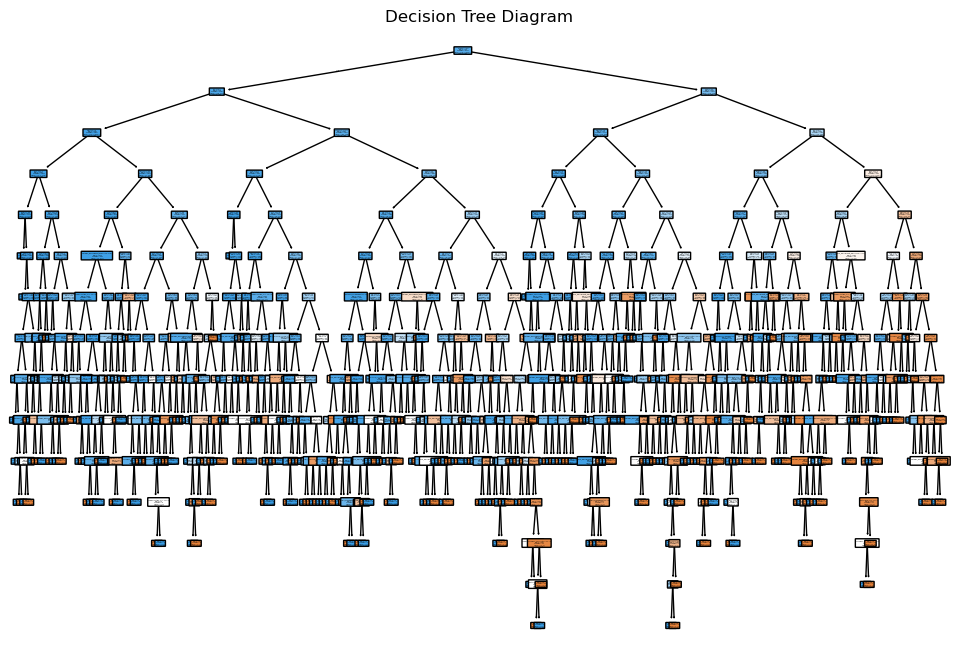

In [76]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X_updated.columns, class_names=['Low', 'High'], rounded=True)
plt.title('Decision Tree Diagram')
plt.show()